# **TED Talk Event and Speaker Analysis**
###*Kiari Williams*


The purpose of this probject is to showcare my ability to clean and curiously explore a fun dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


###Data Gathering
Data Source: *https://www.kaggle.com/rounakbanik/ted-talks* 

This dataset contain information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ast

df = pd.read_csv("TedTalks.csv", index_col= False)

In [ ]:
df.shape

(2550, 17)

In [ ]:
df.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [ ]:
df.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [ ]:
df.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


#Data Wrangling and Manipulation

The original dataset has all time data listed in seconds, which is not helpful for our analysis. These columns needed to be converted to a datetimee format. To maintain the original integrity of the dataset and utilize best practices, a copy of the dataframe was made to perform the rest of the analyis.

In [ ]:
data = df.copy()

In [ ]:
#Convert dates in seconds to datetime 

data['film_year'] = pd.to_datetime(data.film_date, unit = 's').dt.year
data['film_date'] = pd.to_datetime(data.film_date, unit = 's').dt.date
data['published_date'] = pd.to_datetime(data.published_date, unit = 's').dt.date

data['duration'] = df['duration'].astype('float64')  
data['duration'] = pd.to_datetime(data['duration'], unit='s').dt.strftime("%H:%M:%S")

data.set_index('name', inplace =True)

data.head()

,comments,description,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,film_year
name,,,,,,,,,,,,,,,,,
Ken Robinson: Do schools kill creativity?,4553,Sir Ken Robinson makes an entertaining and pro...,00:19:24,TED2006,2006-02-25,60,Ken Robinson,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006
Al Gore: Averting the climate crisis,265,With the same humor and humanity he exuded in ...,00:16:17,TED2006,2006-02-25,43,Al Gore,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006
David Pogue: Simplicity sells,124,New York Times columnist David Pogue takes aim...,00:21:26,TED2006,2006-02-24,26,David Pogue,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006
Majora Carter: Greening the ghetto,200,"In an emotionally charged talk, MacArthur-winn...",00:18:36,TED2006,2006-02-26,35,Majora Carter,1,2006-06-27,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006
Hans Rosling: The best stats you've ever seen,593,You've never seen data presented like this. Wi...,00:19:50,TED2006,2006-02-22,48,Hans Rosling,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006


In [ ]:
data.drop(columns=['url', 'languages', 'related_talks'], inplace= True)

In [ ]:
data['comments_per_view'] = data.comments.sum()/data.views.sum()

In [ ]:
data.shape

(2550, 14)

In [ ]:
data.describe()

,comments,num_speaker,views,comments_per_view
count,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,1.028235,1.698297e+06,1.127967e-04
std,282.315223,0.207705,2.498479e+06,4.025890e-18
min,2.000000,1.000000,5.044300e+04,1.127967e-04
25%,63.000000,1.000000,7.557928e+05,1.127967e-04
50%,118.000000,1.000000,1.124524e+06,1.127967e-04
75%,221.750000,1.000000,1.700760e+06,1.127967e-04
max,6404.000000,5.000000,4.722711e+07,1.127967e-04


#**Exploratory Data Analysis**

The dataframe now contains appropriate datatypes for each value and unecessary columns were removed for this particular use case. 

This next step is exploratory, based in fruther understanding the data and becoming more curious about the data.

##Time at a glance
TED Talks experienced a major shift in growth and popularity in the 2000's despite being around since the 70s.  

In [ ]:
data.film_year.agg(['min','max'])

min    1972
max    2017
Name: film_year, dtype: int64

(1972.0, 2017.0)

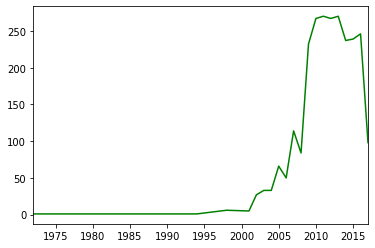

In [ ]:
data.film_year.value_counts().sort_index().plot(color = 'green')
plt.xlim([1972, 2017])

### Which TED events had the largest viewer turn out?

In [ ]:
data.groupby(['film_year', 'event'])['views'].sum().sort_values(ascending = False)

film_year  event                   
2013       TED2013                     177307937
2014       TED2014                     174121423
2013       TEDGlobal 2013              170554736
2015       TED2015                     150826305
2006       TED2006                     147345533
                                         ...    
2011       TEDxIslay                      120274
           TEDxSMU                        117756
           TEDxSanMigueldeAllende         115346
2009       The Do Lectures                112321
2004       University of California        50443
Name: views, Length: 468, dtype: int64

###Which speakers have given the most TED talks?

In [ ]:
frequent_speakers = data.main_speaker.value_counts().head(10)

Hans Rosling            9
Juan Enriquez           7
Rives                   6
Marco Tempest           6
Julian Treasure         5
Dan Ariely              5
Nicholas Negroponte     5
Clay Shirky             5
Bill Gates              5
Jacqueline Novogratz    5
Name: main_speaker, dtype: int64

###What is the most viewed TEDtalk?

In [ ]:
data.groupby(data['title'])['views'].max()

title
 Hidden miracles of the natural world                   7015800
 How CRISPR lets us edit our DNA                        1936760
"(Nothing But) Flowers" with string quartet              621361
"Awoo"                                                   815611
"Black Men Ski"                                          577502
                                                         ...   
Your social media "likes" expose more than you think    2012614
Your words may predict your future mental health        2275945
Yup, I built a nuclear fusion reactor                   3192405
Zombie roaches and other parasite tales                 1624605
“Am I dying?” The honest answer.                        1940683
Name: views, Length: 2550, dtype: int64

###Exploring Ratings

In [ ]:
data['ratings_list'] = data.ratings.apply(lambda x:ast.literal_eval(x)).head()

data.ratings_list.head()

name
Ken Robinson: Do schools kill creativity?        [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
Al Gore: Averting the climate crisis             [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
David Pogue: Simplicity sells                    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
Majora Carter: Greening the ghetto               [{'id': 3, 'name': 'Courageous', 'count': 760}...
Hans Rosling: The best stats you've ever seen    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

In [ ]:
def count_ratings(rating_dict):
    num = 0
    for d in rating_dict:
        num = num + d['count']
    return num

count_ratings(data.ratings_list[0])

93850

In [ ]:
ratings = pd.DataFrame(data.ratings_list[0]).sort_values('count', ascending = False)

ratings.rename(columns={'name': 'rating_type', 'count': 'ratings_num'}, inplace=True)

ratings.drop(columns = 'id', inplace = True)

ratings.reset_index(drop=True)

,rating_type,ratings_num
0,Inspiring,24924
1,Funny,19645
2,Persuasive,10704
3,Fascinating,10581
4,Informative,7346
5,Ingenious,6073
6,Beautiful,4573
7,Jaw-dropping,4439
8,Courageous,3253
9,OK,1174


Text(0, 0.5, 'Rating Categories')

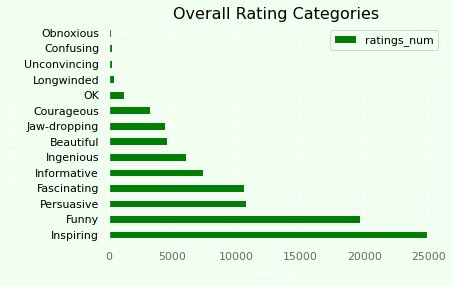

In [ ]:
custom_style = {'figure.figsize':(30,16),
                'axes.facecolor':'honeydew',
                'figure.facecolor':'honeydew',
                'axes.labelcolor': 'white',
                'xtick.color': 'dimgrey',
                'ytick.color': 'black',
                'text.color': 'black',
                }

sns.set_style("darkgrid", rc=custom_style)

#create stacked bar chart
ratings.set_index('rating_type').plot(kind='barh', stacked=True, color='green')

#add overall title
plt.title('Overall Rating Categories', fontsize=16)

#add axis titles
plt.xlabel('Ratings')
plt.ylabel('Rating Categories')

###Which professionals deliver the most fascinating TED talks?

In [ ]:
data['ratings_list'] = data.ratings.apply(lambda x: ast.literal_eval(x))

def most_fascinating(rating_dict):

    for x in rating_dict:
      if x['name'] == 'Fascinating':
        return x['count']

In [ ]:
data['fasc_rating'] = data.ratings_list.apply(most_fascinating)

data[['speaker_occupation','fasc_rating']].head(5)
                                            
#Ted Talks mostly rated as fascinating

,speaker_occupation,fasc_rating
name,,
Ken Robinson: Do schools kill creativity?,Author/educator,10581
Al Gore: Averting the climate crisis,Climate advocate,132
David Pogue: Simplicity sells,Technology columnist,166
Majora Carter: Greening the ghetto,Activist for environmental justice,132
Hans Rosling: The best stats you've ever seen,Global health expert; data visionary,4606


In [ ]:
#Ratio of fascinating ratings each TEDtalk has to total ratings

data['ratings_num'] = data.ratings_list.apply(count_ratings)
data['fasc_ratio'] = data['fasc_rating'] / data['ratings_num']

data.fasc_ratio.describe()
                                                    

count    2550.000000
mean        0.126976
std         0.072907
min         0.000000
25%         0.068449
50%         0.112110
75%         0.175977
max         0.442376
Name: fasc_ratio, dtype: float64

### Who had the most viewed TED Talks by occupation?

In [ ]:
most_viewed_speakers = data.groupby('speaker_occupation').views.mean().sort_values(ascending = False)
most_viewed_speakers.head(10)

speaker_occupation
Neuroanatomist                                    21190883.00
Life coach; expert in leadership psychology       20685401.00
Model                                             19787465.00
Vulnerability researcher                          19578522.00
Career analyst                                    18830983.00
Quiet revolutionary                               17629275.00
Lie detector                                      16861578.00
Psychiatrist, psychoanalyst and Zen priest        16601927.00
Director of research, Samsung Research America    16097077.00
Author/educator                                   15751570.25
Name: views, dtype: float64

### Comparing Ratings between Nueral Anthropologists and Writers

In [ ]:
anthro = data[data['speaker_occupation'] == 'Neurological anthropologist']                                   
anthro = pd.DataFrame(anthro.ratings_list[0]).sort_values('count', ascending = False)
anthro.drop(columns = 'id', inplace = True)
anthro.reset_index(drop=True)
anthro.rename(columns={'name': 'rating_type', 'count': 'ratings_num'}, inplace=True)

In [ ]:
writer = data[data['speaker_occupation'] == 'Writer']                                  
writer = pd.DataFrame(writer.ratings_list[0]).sort_values('count', ascending = False)
writer.drop(columns = 'id', inplace = True)
writer.reset_index(drop=True)
writer.rename(columns={'name': 'rating_type', 'count': 'ratings_num'}, inplace=True)


In [ ]:
most_fasc_speaker = pd.merge(anthro,writer, how='outer', on = ['rating_type','rating_type'])
most_fasc_speaker

,rating_type,ratings_num_x,ratings_num_y
0,Fascinating,2562,2082
1,Informative,2032,2004
2,Inspiring,465,1276
3,Beautiful,344,333
4,Jaw-dropping,246,290
5,Longwinded,190,190
6,Ingenious,182,1127
7,OK,175,361
8,Funny,175,1668
9,Persuasive,160,1014


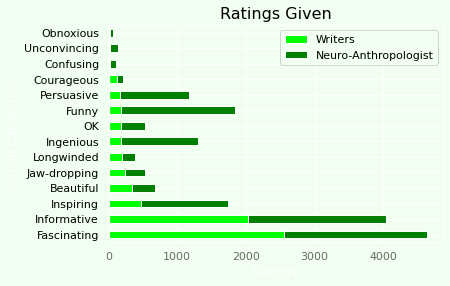

In [ ]:
custom_style = {'figure.figsize':(30,16),
                'axes.facecolor':'honeydew',
                'figure.facecolor':'honeydew',
                'axes.labelcolor': 'white',
                'xtick.color': 'dimgrey',
                'ytick.color': 'black',
                'text.color': 'black',
                }

sns.set_style("darkgrid", rc=custom_style)

#create stacked bar chart
most_fasc_speaker.set_index('rating_type').plot(kind='barh', stacked=True, color=['lime', 'green'])

#add overall title
plt.title('Ratings Given', fontsize=16)

#add axis titles
plt.xlabel('Ratings')
plt.ylabel('Rating Categories')

plt.legend(labels=["Writers","Neuro-Anthropologist"])

#**Summary**

There are no shortage of unique subject matter experts for TEDtalk events. Most viewers felt inspired, greatly informed or watched on with peak fascination.